<h3> Here we're going to do monthly data analysis </h3> 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv(r'C:\Users\asus\Documents\Projects\Sales Data Analysis\Data\Sales_Data-20230415T100143Z-001\combined_data.csv')

In [21]:
df.head(8)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"


In [22]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<i> So here we see that there are in total 545 rows which are completely blank and since they're completely blank we can remove them from our dataframe</i>


In [23]:
df.dropna(inplace=True,how='all')

In [24]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

<i> Fine, all empty rows are removed now but the other challenge is that we don't have a month column to find out monthy trends. However, we do have a date column named Order Date from which we can fetch month data, so let's use it</i>

In [25]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [26]:
'04/19/19 08:46'.split('/')

['04', '19', '19 08:46']

`Hence the month data lies in the first position`

In [27]:
def month(x):
    return x.split('/')[0]
df['Month']=df['Order Date'].apply(month)

In [28]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [30]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [31]:
df['Month']=df['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

<b>Why is this error coming?</b>

In [34]:
df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

* Ok so there's a string value 'Order Date' in column which cannot be converted to int type

In [35]:
filter=df['Month']=='Order Date'
df=df[~filter]

In [36]:
df['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

* Cool, so the Order Date value is now removed from the column. Let's now try to convert the values.

In [37]:
df['Month']=df['Month'].astype(int)

In [39]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

<i> Similarly, let's convert the Quantity Ordered and Price Each column to int and float respectively</i>

In [40]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)

In [41]:
df['Price Each']=df['Price Each'].astype(float)

In [42]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [43]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [44]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [45]:
df.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

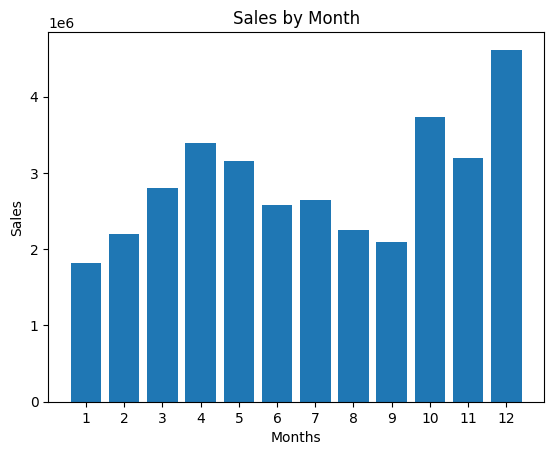

In [55]:
months=range(1,13)
plt.bar(months,df.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()

<i> So here we see that December is the highest Sales month followed by October and April</i>

<h3> Sales by City and Hours </h3>

In [56]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


* Again we see that we don't have a separate City Column and hence we need to derive the same from Purchase Address column 

In [57]:
'917 1st St, Dallas, TX 75001'.split(',')

['917 1st St', ' Dallas', ' TX 75001']

<i> So the 1st index contains city name</i>

In [59]:
def city(x):
    return x.split(',')[1]

In [60]:
df['City']=df['Purchase Address'].apply(city)
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


<Axes: xlabel='City'>

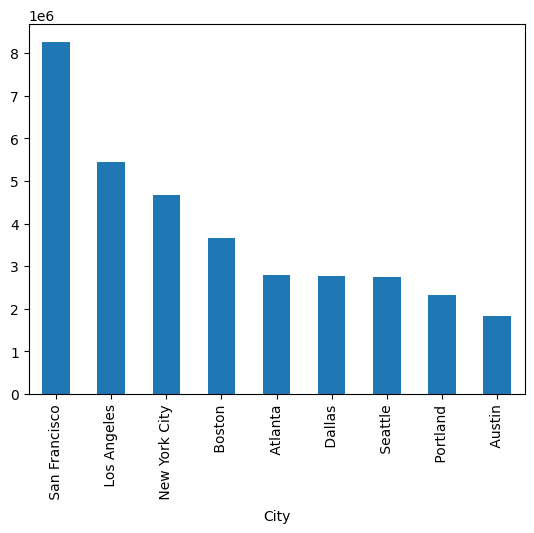

In [73]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False).plot.bar()

<i> So we see that San Francisco is the most Sales producing city followed by Los Angeles and New York City</i>

<u> Now we need to find out the same sales figures on hourly basis </u>

<i> But here again the issue is that we don't have a separate Hour column and we need to derive this as well from the Order Date column </i>

In [76]:
df['Hour']=pd.to_datetime(df['Order Date']).dt.hour

C:\Users\asus\AppData\Local\Temp\ipykernel_54044\901930341.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour']=pd.to_datetime(df['Order Date']).dt.hour


In [77]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14


In [78]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
Hour                  int32
dtype: object

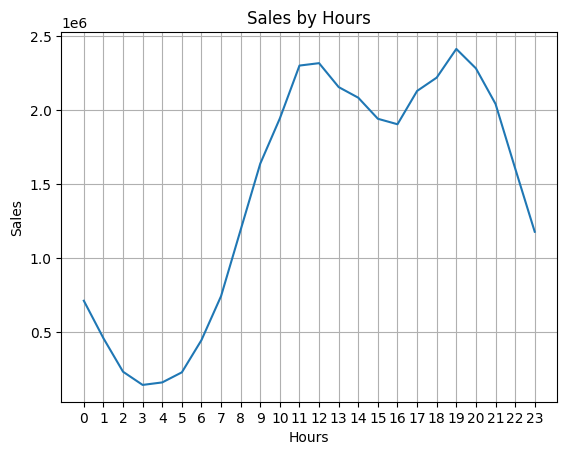

In [92]:
df.groupby('Hour')['Sales'].sum().plot(kind='line')
hours=range(0,24)
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.title('Sales by Hours')
plt.show()

<i> So one important observation that we do here is that at between 9am to 12pm the tred of sales is rising up and is at max and again at around 7pm in evening its high. Hence, we can increase the sales chances at that time if we show advertisments of product during those times</i>